In [14]:
import numpy as np

from sklearn import datasets, linear_model, svm
import matplotlib.pyplot as plt
import style_figs

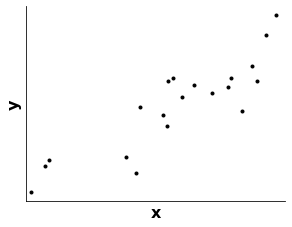

In [15]:

# data generation
np.random.seed(0)
n_sample = 20
x = np.random.rand(n_sample)
noise = np.random.randn(n_sample) * .3
y = 2*x + noise

# fig: linear_data
plt.figure(figsize = (4,3))
ax = plt.axes([.1, .1, .9, .9])
plt.scatter(x,y,  color='k', s=9)

plt.axis('tight')
style_figs.light_axis()
plt.xlim((0,1))
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.savefig('linear_data.svg', facecolor='none', edgecolor='none')

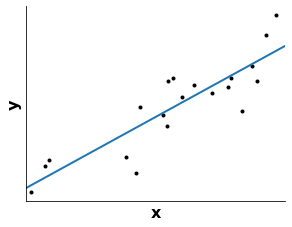

In [16]:
# fit linear regression

lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1,1),y)
grid = np.linspace(0,1, 300)
y_hat = lr.predict(grid.reshape(-1, 1))

# fig: linear_fit

plt.figure(figsize = (4,3))
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()

plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.xlim((0,1))
plt.scatter(x,y,  color='k', s=9)
plt.plot(grid, y_hat, linewidth=2)

plt.savefig('../figures/linear_fit.svg', facecolor='none', edgecolor='none')

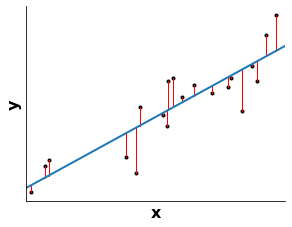

In [17]:
# with error in red

plt.figure(figsize = (4,3))
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.scatter(x,y,  color='k', s=9)
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [xi * lr.coef_ + lr.intercept_, yi], c='r', linewidth = 1)
plt.plot(grid, y_hat, linewidth=2)
plt.xlim((0,1))
plt.savefig('../figures/linear_fit_red.svg')

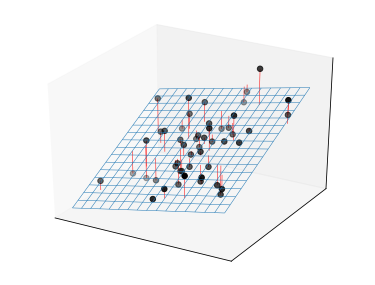

In [57]:
# 3D linear regression

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import numpy as np


np.random.seed(10) #32, 39
X = np.random.randn(50, 2)
noise = np.random.randn(50) * 3
y = X[:,0] + 2 * X[:,1] + noise

linear_model.LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)

x_max = np.max(np.abs(X))
x1 = np.arange(-x_max, x_max, 0.15)
x2 = np.arange(-x_max, x_max, 0.15)
x1_grid, x2_grid = np.meshgrid(x1, x2)
Z = lr.predict(np.concatenate((x1_grid.reshape(-1,1),x2_grid.reshape(-1,1)), axis = 1))
Z = Z.reshape((len(x1),len(x1)))
fig = plt.figure()

ax = fig.gca(projection='3d', facecolor = 'none', zticks = [])

style_figs.light_axis()

# ax.plot_surface(x1_grid, x2_grid, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
ax.plot_wireframe(x1_grid, x2_grid, Z, rstride=2, cstride=2, linewidth = .5)
#     ax.plot_surface(x1_grid, x2_grid, Z, rstride=2, cstride=2, linewidth = .5, alpha = .2)
ax.scatter(X[:,0], X[:,1], y, c = 'k', s = 30)

for i in range(len(X)):
    line = np.array([(X[i,0], X[i,1], a * y[i] + (1-a) * y_hat[i]) for a in np.arange(0,1,.01)])
    ax.plot(line[:,0], line[:,1], line[:,2], c = 'r', linewidth=.5)

plt.savefig('../figures/lin_reg_3D.svg', facecolor='none', edgecolor='none')

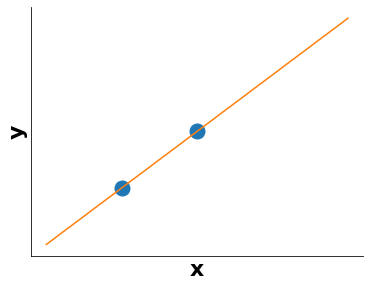

In [66]:
# Ridge variance
# from http://scipy-lectures.org/packages/scikit-learn/index.html#bias-variance-trade-off-illustration-on-a-simple-regression-problem
X = np.c_[ .5, 1].T
y = [.5, 1]
X_test = np.c_[ 0, 2].T

regr = linear_model.LinearRegression()
regr.fit(X, y)

plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=22, weight=600)
plt.xlabel('x', size=22, weight=600)
plt.plot(X, y, 'o', markersize = 15) 
plt.plot(X_test, regr.predict(X_test), linewidth = 1.5)
plt.savefig('../figures/lin_reg_2_points.svg', facecolor='none', edgecolor='none')

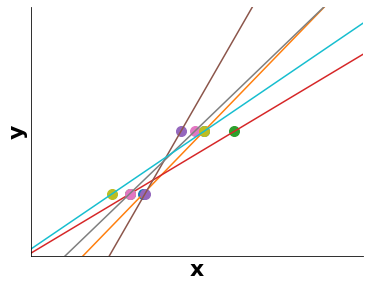

In [60]:
np.random.seed(0)
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=22, weight=600)
plt.xlabel('x', size=22, weight=600)
plt.xlim((0,2))
plt.ylim((0,2))
for _ in range(5):
    noisy_X = X + np.random.normal(loc=0, scale=.1, size=X.shape)
    plt.plot(noisy_X, y, 'o', markersize = 10)
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test), linewidth = 1.5)
plt.savefig('../figures/lin_reg_2_points_no_penalty.svg', facecolor='none', edgecolor='none')

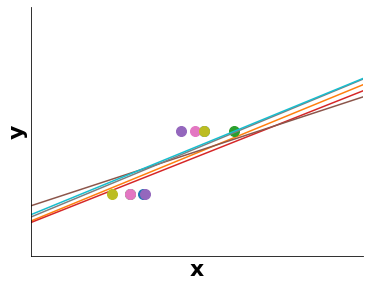

In [61]:
regr = linear_model.Ridge(alpha=.1)
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=22, weight=600)
plt.xlabel('x', size=22, weight=600)
np.random.seed(0)
plt.xlim((0,2))
plt.ylim((0,2))
for _ in range(5):
    noisy_X = X + np.random.normal(loc=0, scale=.1, size=X.shape)
    plt.plot(noisy_X, y, 'o', markersize = 10)
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test), linewidth = 1.5)
    
plt.savefig('../figures/lin_reg_2_points_ridge.svg', facecolor='none', edgecolor='none')

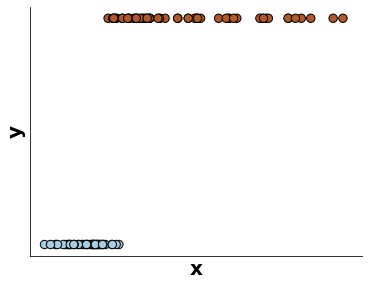

In [54]:
# Categorical


xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X_train = X[:, np.newaxis]
y_train = y

# Create linear regression object
regr = linear_model.LogisticRegression(C=1e5)

# Train the model using the training sets
regr.fit(X_train, y_train)

# plot the line, the points, and the nearest vectors to the plane
plt.figure()
plt.clf()
ax = plt.axes([.1, .1, .9, .9])

style_figs.light_axis()
plt.ylabel('y', size=20, weight=600)
plt.xlabel('x', size=20, weight=600)
plt.scatter(X_train, y_train, s=70, zorder=20, c=y, edgecolor='k', cmap=plt.cm.Paired)

plt.xlim(-3, 10)
plt.savefig('categorical.svg', facecolor='none', edgecolor='none')


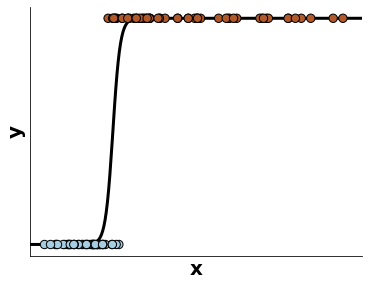

In [55]:

def model(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(-4, 10, 300)
loss = model(X_test * regr.coef_ + regr.intercept_).ravel()

plt.axes([.1, .1, .9, .9])
plt.plot(X_test, loss, color='k', linewidth=3)

plt.xlim(-3, 10)
# pl.savefig('logistic.pdf', facecolor='k', edgecolor='k')

plt.scatter(X.ravel(), y, c=y, zorder=25, s=70, edgecolor='k',
            cmap=plt.cm.Paired)

plt.xlim(-3, 10)

style_figs.light_axis()

plt.ylabel('y', size=20, weight=600)
plt.xlabel('x', size=20, weight=600)
plt.savefig('logistic_color.svg', facecolor='none', edgecolor='none')

# # A 2D version
# pl.figure(2, figsize=(3, 3), facecolor='k')


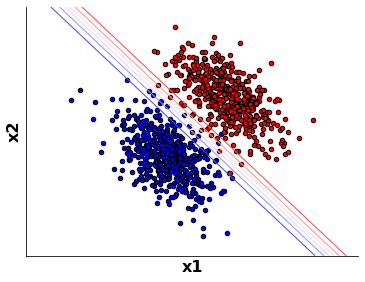

In [63]:
# 2D logistic
# Adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>

from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5]]#, [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

multi_class = 'multinomial'
clf = linear_model.LogisticRegression(solver='sag', max_iter=100, random_state=42,
                         multi_class=multi_class).fit(X, y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
ax = plt.axes([.1, .1, .9, .9])
plt.contour(xx, yy, -Z, cmap = plt.cm.bwr, linewidths = 1)


# Plot also the training points
colors = "br"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                edgecolor='black', s=20)

style_figs.light_axis()
plt.ylabel('x2', size=16, weight=600)
plt.xlabel('x1', size=16, weight=600)
plt.savefig('logistic_2D.svg', facecolor='none', edgecolor='none')


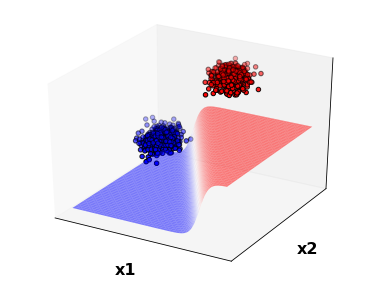

In [65]:
# 3D logistic

from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [3, 1]]#, [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

multi_class = 'multinomial'
clf = linear_model.LogisticRegression(solver='sag', max_iter=100, random_state=42,
                         multi_class=multi_class).fit(X, y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure()

ax = fig.gca(projection='3d', facecolor = 'none', zticks = [])

style_figs.light_axis()

ax.plot_surface(xx, yy, -Z, cmap = plt.cm.bwr, linewidths = 1, alpha = .5)




# Plot also the training points
colors = "br"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    ax.scatter(X[idx, 0], X[idx, 1], y[idx], c=color, edgecolor='black', s=20)

style_figs.light_axis()
plt.ylabel('x2', size=16, weight=600)
plt.xlabel('x1', size=16, weight=600)
# ax.set_zlabel('y', size=16, weight=600)
plt.savefig('logistic_3D.svg', facecolor='none', edgecolor='none')


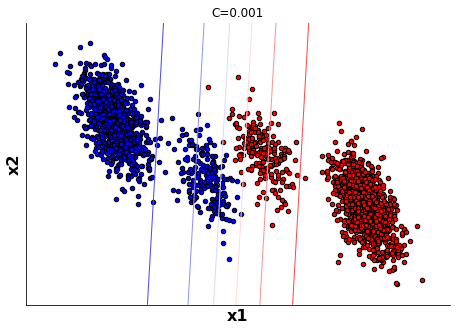

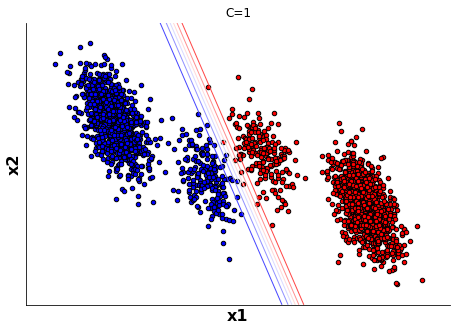

In [196]:
# Logistic,  varying C

from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 2], [0, 2]]
X, y = make_blobs(n_samples=400, centers=centers, random_state=40)
centers_outlier = [[-10, 5], [6, - 1]]
X_outlier, y_outlier = make_blobs(n_samples=2000, centers=centers_outlier, random_state=40)

X, y = np.concatenate((X, X_outlier)), np.concatenate((y, y_outlier))

transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)


for C in [.001,1]:
    multi_class = 'multinomial'
    clf = linear_model.LogisticRegression(C = C,  solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = - clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contour(xx, yy, Z, cmap=plt.cm.bwr, linewidths = 1)
    # plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    # plt.axis('tight')



    # Plot also the training points
    colors = "br"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    style_figs.light_axis()
    plt.ylabel('x2', size=16, weight=600)
    plt.xlabel('x1', size=16, weight=600)
    plt.title('C=' + str(C))
    plt.savefig('logistic_2D_C' + str(C) + '.svg', facecolor='none', edgecolor='none')


training score : 0.995 (multinomial)


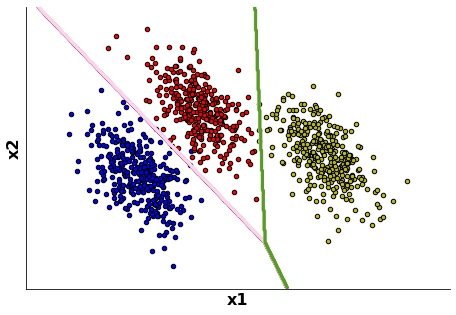

In [203]:
# Multinomial 
# Adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

multi_class = 'multinomial'
clf = linear_model.LogisticRegression(solver='sag', max_iter=100, random_state=42,
                         multi_class=multi_class).fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contour(xx, yy, Z, cmap=plt.cm.PiYG)
# plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis('tight')
style_figs.light_axis()


# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

plt.ylabel('x2', size=16, weight=600)
plt.xlabel('x1', size=16, weight=600)
plt.savefig('multinomial.svg', facecolor='none', edgecolor='none')


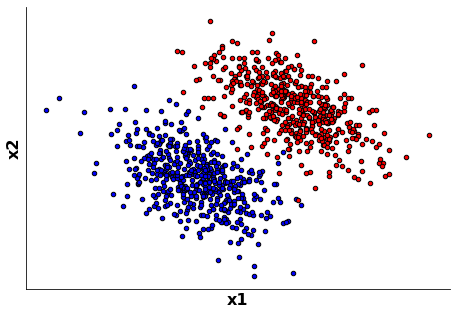

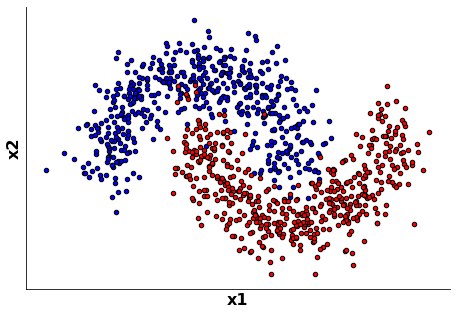

In [17]:
# Linear separability
from sklearn.datasets import make_blobs, make_moons

# separable
centers = [[-5, 0], [0, 1.5]]#, [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

style_figs.light_axis()


# Plot also the training points
colors = "br"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

plt.ylabel('x2', size=16, weight=600)
plt.xlabel('x1', size=16, weight=600)
plt.savefig('lin_separable.svg', facecolor='none', edgecolor='none')


### NOT separable

X, y = make_moons(n_samples=1000, random_state=40, noise = .2)

plt.figure()
style_figs.light_axis()

# Plot also the training points
colors = "br"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

plt.ylabel('x2', size=16, weight=600)
plt.xlabel('x1', size=16, weight=600)
plt.savefig('lin_not_separable.svg', facecolor='none', edgecolor='none')

